Коэффициент корреляции Пирсона: -0.9856787333836711
Весьма выскоая зависимость
crit:  1.984467454426692 Stat:  57.863302506875485
Нулевая гипотезя отвергается, коэффициент отличен от нуля


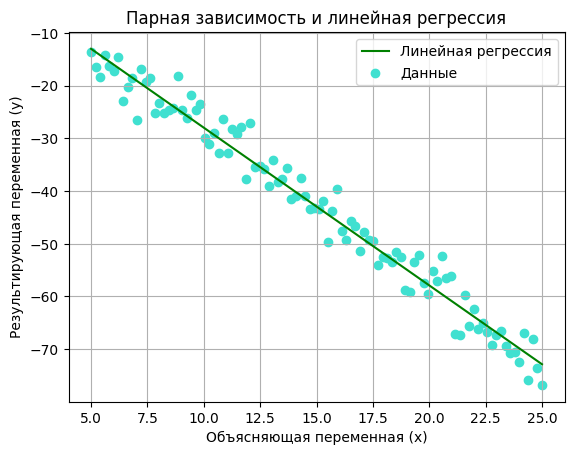

Итоговая модель зависимости: y = -2.9929318274041705 * x + 1.946057059857995
crit 0.7165989462583362 Stat:  34.809714919213924
Нулевая гипотеза отверагется, диспресии не равны
Значимость параметров: 
True True
Доверительные интервалы
a:  [-3.0713160796141468, -2.9145475751941943] Длина:  0.1567685044199525 b:  [0.9516674372040458, 2.940446682511944] Длина:  0.1567685044199525


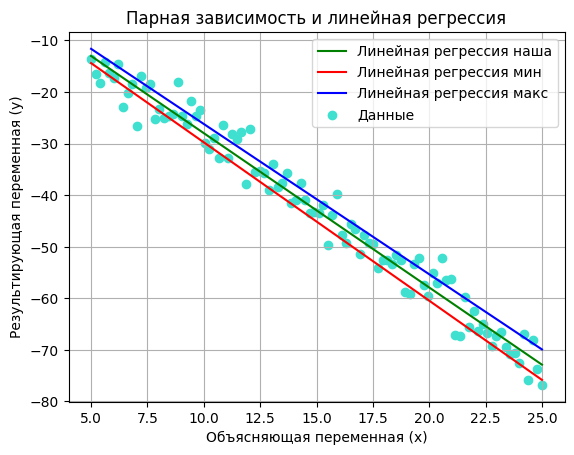

In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

def pearson_correlation(x, y):


 mean_x = np.mean(x)
 mean_y = np.mean(y)


 sum_xy_diff = np.sum((x - mean_x) * (y - mean_y))


 sum_x_diff_sq = np.sum((x - mean_x) ** 2)
 sum_y_diff_sq = np.sum((y - mean_y) ** 2)


 correlation_coefficient = sum_xy_diff / (np.sqrt(sum_x_diff_sq) * np.sqrt(sum_y_diff_sq))

 return correlation_coefficient


data = np.loadtxt("1.txt", delimiter=",")

x = data[:, 0]
y = data[:, 1]


correlation_coefficient = pearson_correlation(x, y)


print("Коэффициент корреляции Пирсона:", correlation_coefficient)
print("Весьма выскоая зависимость")

n = len(x)
crit = stats.t.ppf(0.975, n - 2)


t_statistic = abs(correlation_coefficient) * np.sqrt((n - 2) / (1 - correlation_coefficient**2))

print("crit: ", crit,"Stat: ", abs(t_statistic))
if (crit >= abs(t_statistic)):
  print("Нулевая гипотеза принимается, коэффициент равен нулю")
else:
  print("Нулевая гипотезя отвергается, коэффициент отличен от нуля")



def linear_regression(x, y):



 if len(x) != len(y):
  raise ValueError("Массивы должны иметь одинаковую длину.")

 # Рассчет сумм и средних значений
 n = len(x)
 sum_x = np.sum(x)
 sum_y = np.sum(y)
 sum_xy = np.sum(x * y)
 sum_x2 = np.sum(x**2)

 # Вычисление коэффициентов a и b
 a = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
 b = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x**2)

 return a, b


a, b = linear_regression(x,y)

y_predicted = a * x + b
plt.plot(x, y_predicted, color='green', label="Линейная регрессия")
plt.scatter(x,y, color = "turquoise", label = "Данные")
# Настройка графика
plt.xlabel("Объясняющая переменная (x)")
plt.ylabel("Результирующая переменная (y)")
plt.title("Парная зависимость и линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()


print("Итоговая модель зависимости: y = {} * x + {}".format(a, b))

sse = np.sum((y - y_predicted)**2) / (n - 2)


sst = np.sum((y - np.mean(y))**2) / (n - 1)

f_statistic = max(sse, sst) / min(sse,sst)

crit_f = stats.f.ppf(0.05, n - 2, n - 1)

print("crit", crit_f,"Stat: ", f_statistic)
if crit_f < f_statistic:
  print("Нулевая гипотеза отверагется, диспресии не равны")
else:
  print("Нулевая гипотеза принимается, диспресии равны")

std_error_a = np.sqrt(sse / (np.sqrt(np.sum((x - np.mean(x))**2)) * n))

std_error_b = np.sqrt(sse * np.sqrt(sum(x ** 2)) / (np.sqrt(np.sum((x - np.mean(x))**2)) * n)  )
t_statistic_a = a / std_error_a
t_statistic_b = b / std_error_b

print("Значимость параметров: ")
print(abs(t_statistic_a) > crit, abs(t_statistic_b) > crit)





dov_a = [0] * 2
dov_a[0] = a - crit * std_error_a
dov_a[1] = a + crit * std_error_a

dov_b = [0] * 2
dov_b[0] = b - crit * std_error_b
dov_b[1] = b + crit * std_error_b

print("Доверительные интервалы")
print("a: ", dov_a, "Длина: ", dov_a[1] - dov_a[0], "b: ", dov_b, "Длина: ", dov_a[1] - dov_a[0])


y_predicted_max = dov_a[1] * x + dov_b[1]
y_predicted_min = dov_a[0] * x + dov_b[0]
plt.plot(x, y_predicted, color='green', label="Линейная регрессия наша")
plt.plot(x, y_predicted_min, color='red', label="Линейная регрессия мин")
plt.plot(x, y_predicted_max, color='blue', label="Линейная регрессия макс")
plt.scatter(x,y, color = "turquoise", label = "Данные")
# Настройка графика
plt.xlabel("Объясняющая переменная (x)")
plt.ylabel("Результирующая переменная (y)")
plt.title("Парная зависимость и линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()




# Определите значение x для прогноза
dx = x[len(x) - 1] - x[len(x) - 2]

E =stats.t.ppf(0.05, n - 2) * sse * np.sqrt((1 + 1/len(x) + (x[len(x) - 1] + dx - np.mean(x))**2 / (np.sum((x - np.mean(x))**2) * n)))

y_new_predicted_5 = a * (x[len(x) - 1] + dx) + b

dov_pred = [0] * 2
dov_pred[0] = y_new_predicted_5 - E
dov_pred[1] = y_new_predicted_5 + E

print("Интервал предсказанных значений: ")
print(dov_pred)

dx = x[len(x) - 1] - x[len(x) - 2]

E =stats.t.ppf(0.05, n - 2) * sse * np.sqrt((1 + 1/len(x) + (x[len(x) - 1] + 2 * dx - np.mean(x))**2 / (np.sum((x - np.mean(x))**2) * n)))

y_new_predicted_5 = a * (x[len(x) - 1] + 2 * dx) + b

dov_pred = [0] * 2
dov_pred[0] = y_new_predicted_5 - E
dov_pred[1] = y_new_predicted_5 + E

print("Интервал предсказанных значений: ")
print(dov_pred)

dx = x[len(x) - 1] - x[len(x) - 2]

E =stats.t.ppf(0.05, n - 2) * sse * np.sqrt((1 + 1/len(x) + (x[len(x) - 1] + 3 * dx - np.mean(x))**2 / (np.sum((x - np.mean(x))**2) * n)))

y_new_predicted_5 = a * (x[len(x) - 1] + 3 * dx) + b

dov_pred = [0] * 2
dov_pred[0] = y_new_predicted_5 - E
dov_pred[1] = y_new_predicted_5 + E

print("Интервал предсказанных значений: ")
print(dov_pred)


Группа 1 (категория 0):
Наклон (a): 2.4534934502789594
Свободный член (b): 0.8421762557051528

Группа 2 (категория 1):
Наклон (a): -0.8885693574826303
Свободный член (b): -0.028691592782630927
Crit:  0.05130672020965364 Stat:  30982.95012917551
Нулевая гипотеза отвергается, подвыборки неоднородны
[0. 1.]


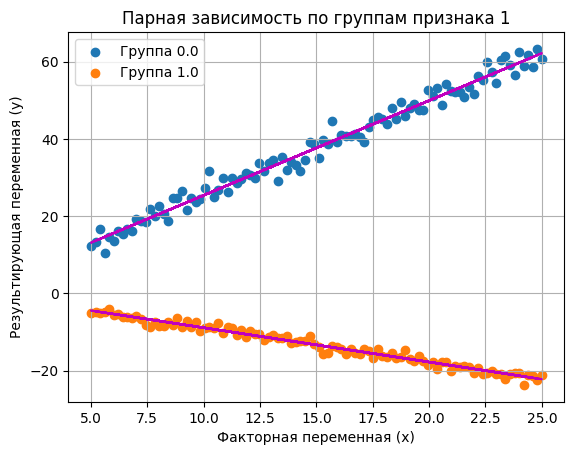

[0. 1.]


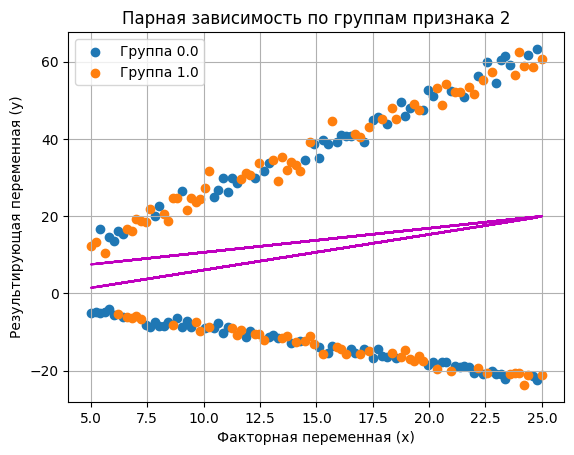

In [ ]:


data = np.loadtxt("2.txt", delimiter=",")


x = data[:, 0]
y = data[:, 3]
group1 = data[:, 1] == 0
group2 = data[:, 1] == 1


x_group1 = x[group1]
y_group1 = y[group1]
x_group2 = x[group2]
y_group2 = y[group2]


a_group1, b_group1 = linear_regression(x_group1, y_group1)
a_group2, b_group2 = linear_regression(x_group2, y_group2)
a, b = linear_regression(x, y)


print("Группа 1 (категория 0):")
print("Наклон (a):", a_group1)
print("Свободный член (b):", b_group1)

print("\nГруппа 2 (категория 1):")
print("Наклон (a):", a_group2)
print("Свободный член (b):", b_group2)


y_predicted_all = a * x + b
sse_all = np.sum((y - y_predicted_all)**2)

# Вычислите SSE для отдельных моделей
sse_group1 = np.sum((y_group1 - (a_group1 * x_group1 + b_group1))**2)
sse_group2 = np.sum((y_group2 - (a_group2 * x_group2 + b_group2))**2)

# Рассчитайте F-статистику
f_statistic = ((sse_all - (sse_group1 + sse_group2)) / 2) / ((sse_group1 + sse_group2) / (len(x) - 2))

print("Crit: ", stats.f.ppf(0.05, 2, len(x) - 4), "Stat: ", f_statistic)
if stats.f.ppf(0.05, 2, len(x) - 4) < f_statistic:
  print("Нулевая гипотеза отвергается, подвыборки неоднородны")
else:
    print("Нулевая гипотеза приниматеся, подвыборки однородны")


for i in range(1, 3):





  if True:


    groups = np.unique(data[:, i])
    print(groups)
    for group in groups:
      group_indices = data[:, i] == group
      x_group = x[group_indices]
      y_group = y[group_indices]
      a_group, b_group = linear_regression(x_group, y_group)
      y_predicted_group = a_group * x_group + b_group
      plt.scatter(x_group, y_group, label=f"Группа {group}")
      plt.plot(x_group, y_predicted_group, color='m')
    plt.xlabel("Факторная переменная (x)")
    plt.ylabel("Результирующая переменная (y)")
    plt.title(f"Парная зависимость по группам признака {i}")
    plt.legend()
    plt.grid(True)
    plt.show()

Итоговая модель зависимости: y = 2.2215221780206793 * x + 0.14397809594616953
crit 0.7165989462583362 Stat:  1.0618545633956176
Нулевая гипотеза отверагется, диспресии не равны


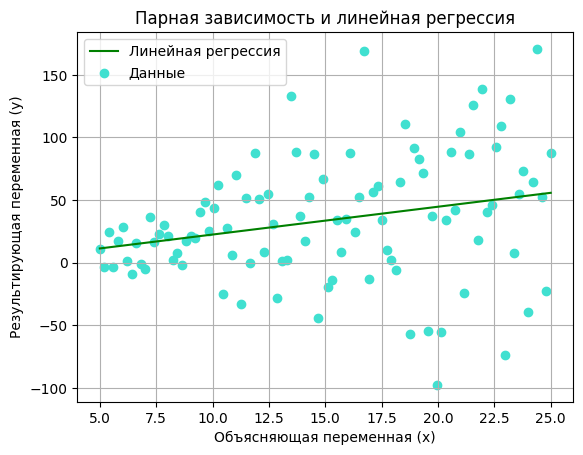

Значимость параметров: 
True False
Crit:  1.984467454426692 Stat:  2857.5822823051185
Дисперсии неоднороды, всё не ок
Crit:  0.5752603347787958 Stat:  0.39629817355922403
Дисперсии равны


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
import pandas as pd
data = np.loadtxt("3.txt", delimiter=",")

x = data[:, 0]
y = data[:, 1]

a, b = linear_regression(x, y)

n = len(x)


print("Итоговая модель зависимости: y = {} * x + {}".format(a, b))

y_predicted = a * x + b

sse = np.sum((y - y_predicted)**2) / (n - 2)


sst = np.sum((y - np.mean(y))**2) / (n - 1)

f_statistic = max(sse, sst) / min(sse,sst)

crit_f = stats.f.ppf(0.05, n - 2, n - 1)

print("crit", crit_f,"Stat: ", f_statistic)
if crit_f < f_statistic:
  print("Нулевая гипотеза отверагется, диспресии не равны")
else:
  print("Нулевая гипотеза принимается, диспресии равны")



plt.plot(x, y_predicted, color='green', label="Линейная регрессия")
plt.scatter(x,y, color = "turquoise", label = "Данные")

plt.xlabel("Объясняющая переменная (x)")
plt.ylabel("Результирующая переменная (y)")
plt.title("Парная зависимость и линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()


std_error_a = np.sqrt(sse / (np.sqrt(np.sum((x - np.mean(x))**2)) * n))

std_error_b = np.sqrt(sse * np.sqrt(sum(x ** 2)) / (np.sqrt(np.sum((x - np.mean(x))**2)) * n)  )
t_statistic_a = a / std_error_a
t_statistic_b = b / std_error_b

print("Значимость параметров: ")
print(abs(t_statistic_a) > crit, abs(t_statistic_b) > crit)



ostat = abs(y - y_predicted)

ranked_x = pd.Series(x).rank()
ranked_y = pd.Series(y - y_predicted).rank()


sperman = 1 - ((6 *(sum(ranked_y - ranked_x) + 1)) / (n* (n**2 - 1)))

t_stat = (sperman * np.sqrt(n - 2)) / (np.sqrt(1 - sperman**2))
crit_t = stats.t.ppf(0.975, n - 2)

print("Crit: ", crit_t, "Stat: ", t_stat)
if crit_t >= t_stat:

  print("Дисперсии однородны, всё ок")
else:
  print("Дисперсии неоднороды, всё не ок")

n_pred = len(y_predicted)


quarter1 = int(0.375 * n)
quarter3 = int(0.625 * n)

ready_pred = pd.DataFrame(y_predicted).drop(index = range(quarter1, quarter3))

m1 = ready_pred.iloc[: int((3/8) * n_pred)]
m2 = ready_pred.iloc[int((3/8) * n_pred) :int((3/8) * n_pred * 2)]

# print(y_predicted, m1, m2)

sse1 = np.sum((pd.DataFrame(y).iloc[: int((3/8) * n_pred)] - m1)**2) / (len(m1) - 1)
sse2 = np.sum((pd.DataFrame(y).iloc[int((3/8) * n_pred) :int((3/8) * n_pred * 2)] - m2)**2) / (len(m2) - 1)

# print(sse2[0])
f_stat = sse1[0] / sse2[0]
f_crit = stats.f.ppf(0.05, len(m1) - 1, len(m2) - 1)

print("Crit: ", f_crit, "Stat: ", f_stat)
if f_stat > f_crit:
  print("Дисперсии не равны")
else:
  print("Дисперсии равны")